<a href="https://colab.research.google.com/github/shreyasat27/MSc-QT-/blob/main/task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [304]:
!pip install qutip


In [305]:
# Import necessary libraries
import qutip
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from qutip import (about, basis, destroy, mesolve, ptrace, qeye,
                   tensor, wigner, anim_wigner, Qobj,)
# set a parameter to see animations in line
from matplotlib import rc
rc('animation', html='jshtml')

%matplotlib inline



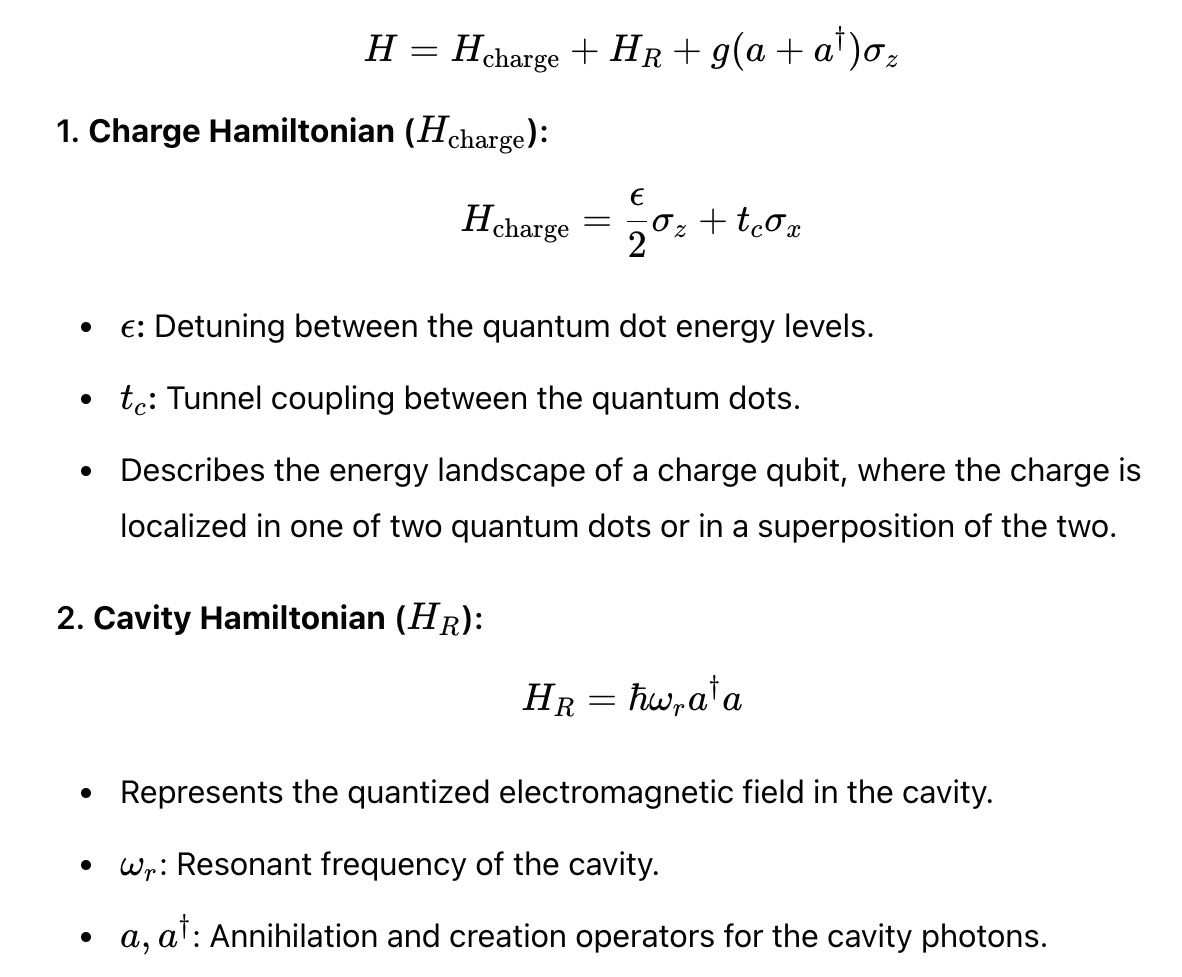

In [306]:
# Define system parameters
epsilon = 1.5 * 2 * np.pi  # Energy detuning of the qubit (in angular frequency units)
t_c = 0.2 * 2 * np.pi      # Tunnel coupling between qubit states (in angular frequency units)
omega_r = 2 * 2 * np.pi  # Resonant frequency of the cavity (in angular frequency units)
g = 0.1 * 2 * np.pi       # Coupling strength between qubit and cavity (in angular frequency units)
N = 25                     # Number of Fock states in the cavity mode

# Define dissipation rates
kappa = 0.00005              # Cavity dissipation rate
gamma = 0.0005               # Qubit relaxation rate
n_th_a = 0.0  # avg number of thermal bath excitation
# Define time evolution parameters
tlist = np.linspace(0, 15, 100)  # Time array for simulation
use_rwa = False

In [307]:
# intial state
psi0 = tensor(basis(N, 0), basis(2, 1))

# operators
a = tensor(destroy(N), qeye(2)) # Annihilation operator for the cavity
sm = tensor(qeye(N), destroy(2)) # Creation operator for the cavity

# Define Pauli matrices for the qubit
sigma_z = qutip.Qobj([[1, 0], [0, -1]])  # Pauli Z matrix
sigma_x = qutip.Qobj([[0, 1], [1, 0]])   # Pauli X matrix

# Extend Pauli matrices to the full Hilbert space
sigma_z = tensor(qeye(N), sigma_z)
sigma_x = tensor(qeye(N), sigma_x)



In [308]:
# Define the Hamiltonian components
H_charge = (0.5 * epsilon * sigma_z) + (t_c * sigma_x)
H_cavity = omega_r * sm * a
H_interaction = g * (a + sm) * sigma_z

# Total Hamiltonian
H = H_charge + H_cavity + H_interaction



In [309]:
print (H)

Quantum object: dims=[[25, 2], [25, 2]], shape=(50, 50), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 4.71238898  0.62831853  0.62831853 ...  0.          0.
   0.        ]
 [ 1.25663706 -4.71238898  0.         ...  0.          0.
   0.        ]
 [ 0.          0.          4.71238898 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ... -4.71238898  0.
  -3.07811959]
 [ 0.          0.          0.         ...  0.          4.71238898
   0.62831853]
 [ 0.          0.          0.         ...  0.          1.25663706
  -4.71238898]]


In [310]:



# Define collapse operators for dissipation
#c_ops = []

c_ops =[ np.sqrt(kappa) * a,  # Cavity dissipation
    np.sqrt(gamma * (1 + n_th_a)) * sm,  # Qubit relaxation
    np.sqrt(gamma * n_th_a) * sm.dag()  # Thermal excitation (optional if n_th_a > 0)
    ]


In [311]:
# Solve the master equation
output = mesolve(H, psi0, tlist, c_ops, [a.dag()*a, sm.dag()*sm])

#result = mesolve(H, psi0, times, [], [sigmaz(), sigmay()])

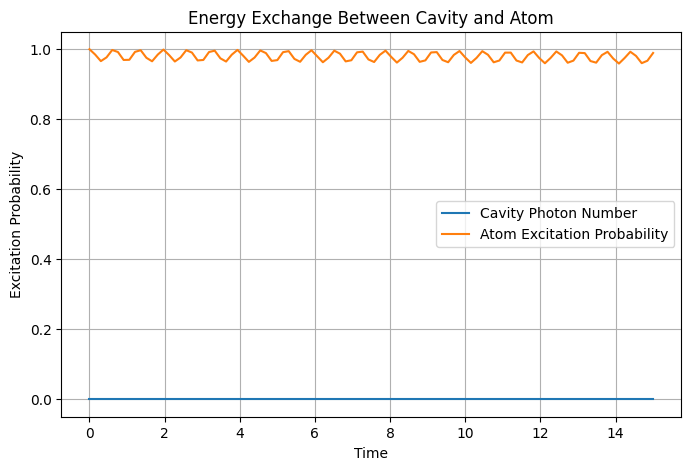

In [312]:
# Extract results
n_cavity = output.expect[0]  # Cavity photon number
n_atom = output.expect[1]    # Atom excitation probability

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(tlist, n_cavity, label="Cavity Photon Number ")
plt.plot(tlist, n_atom, label="Atom Excitation Probability")
plt.xlabel("Time")
plt.ylabel("Excitation Probability")
plt.title("Energy Exchange Between Cavity and Atom")
plt.legend()
plt.grid()
plt.show()

In [313]:
output.states

[]